# Zillow Project

Python ipynb file that clearly shows the procedure of analyzing, data visualization,  or any relevant content to explore and answer the research questions. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
pd.set_option('display.max_columns',5000)
pd.set_option('display.max_rows',5000)

#imputing, scale and partition
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split

#regression models
from dmba import regressionSummary #might have to pip install dmba
from sklearn.linear_model import Ridge, LassoCV
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Google Maps API
import googlemaps
from datetime import datetime

In [2]:
z4 = pd.read_csv('Zillow-CleanedData.csv')

In [3]:
z4 = z4[['Address','State', 'Zestimate', 'Listing-Company','Link',
         'Price', 'City', 'ZipCode', 'Bedrooms','HOA', 'Living-Area',
         'Total-Bathrooms', 'Garage-Spaces', 'Home-Type','Year-Built',
         'Utilities', 'Sunscore', 'Annual-Tax', 'Tax-Value']]

In [4]:
z4.head(2)

,Address,State,Zestimate,Listing-Company,Link,Price,City,ZipCode,Bedrooms,HOA,Living-Area,Total-Bathrooms,Garage-Spaces,Home-Type,Year-Built,Utilities,Sunscore,Annual-Tax,Tax-Value
0,"2863 S Bascom Ave APT 808, Campbell, CA 95008",CA,603718,COMPASS,https://www.zillow.com/homedetails/2863-S-Basc...,599000,Campbell,95008,2,445.0,841.0,2,0,Condo,1984,Public Utilities,95.26,7168.0,532888.0
1,"6035 Admiralty Pl, San Jose, CA 95123",CA,919331,GOLDEN GATE SOTHEBY'S,https://www.zillow.com/homedetails/6035-Admira...,895000,San Jose,95123,3,117.0,1328.0,3,0,Single Family,1994,Public Utilities,81.65,8062.0,590585.0


In [5]:
z4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          1072 non-null   object 
 1   State            1072 non-null   object 
 2   Zestimate        1072 non-null   int64  
 3   Listing-Company  1072 non-null   object 
 4   Link             1072 non-null   object 
 5   Price            1072 non-null   int64  
 6   City             1072 non-null   object 
 7   ZipCode          1072 non-null   int64  
 8   Bedrooms         1072 non-null   int64  
 9   HOA              1072 non-null   float64
 10  Living-Area      1072 non-null   float64
 11  Total-Bathrooms  1072 non-null   int64  
 12  Garage-Spaces    1072 non-null   int64  
 13  Home-Type        1072 non-null   object 
 14  Year-Built       1072 non-null   int64  
 15  Utilities        1072 non-null   object 
 16  Sunscore         1072 non-null   float64
 17  Annual-Tax    

In [ ]:
sns.pairplot(z4, corner=True)
plt.savefig('Pairplot.png')

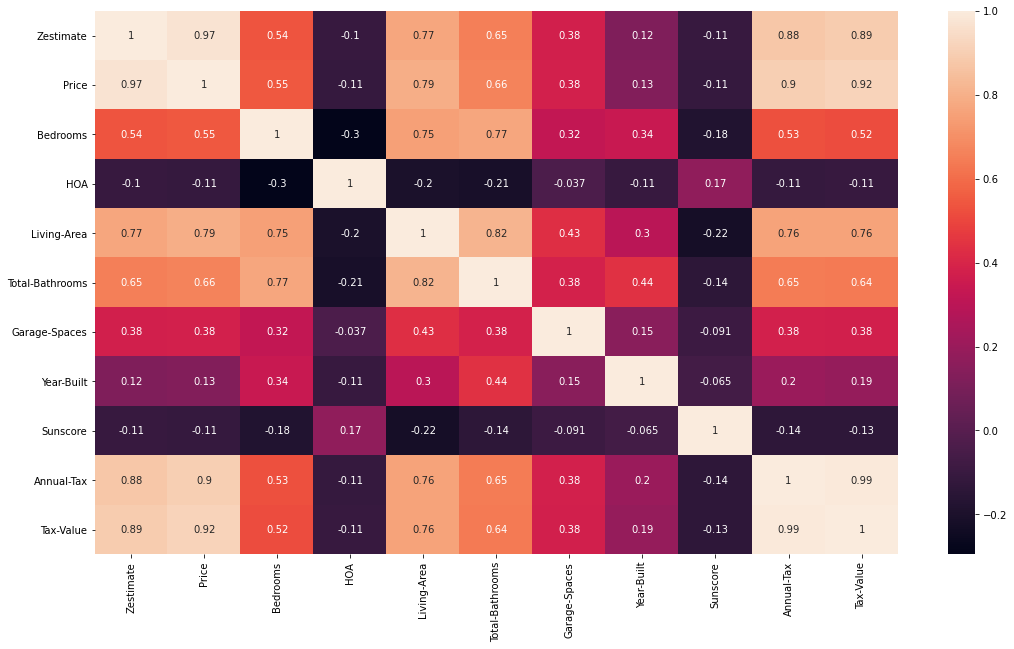

In [9]:
z4_heatmap = z4[['Address','State', 'Zestimate', 'Listing-Company','Link',
         'Price', 'City', 'Bedrooms','HOA', 'Living-Area',
         'Total-Bathrooms', 'Garage-Spaces', 'Home-Type','Year-Built',
         'Utilities', 'Sunscore', 'Annual-Tax', 'Tax-Value']]
plt.figure(figsize=(18,10))
sns.heatmap(z4_heatmap.corr(),annot=True)
plt.savefig('Correlation_Heatmap.png')

# Building Regression Model to predict Listing price and then comparing it with Zestimate.

### Preparing Data for Regression Model

In [10]:
dummyCity = pd.get_dummies(z4['City'], prefix_sep='City_', drop_first=False)
z4=pd.concat([z4, dummyCity], axis=1)

dummyHomeType = pd.get_dummies(z4['Home-Type'], prefix_sep='Type_', drop_first=False)
z4=pd.concat([z4, dummyHomeType], axis=1)

dummyUtilities = z4['Utilities'].str.get_dummies(sep=',')
z4=pd.concat([z4, dummyUtilities], axis=1)

dummyZipCode = pd.get_dummies(z4['ZipCode'], prefix_sep='Type_', drop_first=False)
z4=pd.concat([z4, dummyZipCode], axis=1)

In [11]:
z4 = z4.drop(['City'],axis=1)
z4 = z4.drop(['Home-Type'],axis=1)
z4 = z4.drop(['Utilities'],axis=1)
z4 = z4.drop(['ZipCode'],axis=1)

In [12]:
z4.head(2)

,Address,State,Zestimate,Listing-Company,Link,Price,Bedrooms,HOA,Living-Area,Total-Bathrooms,Garage-Spaces,Year-Built,Sunscore,Annual-Tax,Tax-Value,Alameda,Antioch,Atherton,Bay Point,Berkeley,Brentwood,Campbell,Castro Valley,Concord,Cupertino,Daly City,Danville,Dublin,East Palo Alto,Fairfield,Foster City,Fremont,Gilroy,Half Moon Bay,Hayward,Livermore,Martinez,Menlo Park,Milpitas,Morgan Hill,Mountain View,Napa,Novato,Oakland,Oakley,Pacheco,Pacifica,Palo Alto,Petaluma,Pittsburg,Pleasant Hill,Pleasanton,Redwood City,Richmond,Rohnert Park,San Bruno,San Francisco,San Jose,San Leandro,San Lorenzo,San Mateo,San Pablo,San Rafael,San Ramon,Santa Clara,Santa Rosa,South San Francisco,Sunnyvale,Union City,Vacaville,Vallejo,Walnut Creek,Condo,Mobile / Manufactured,Multiple Occupancy,Other,Single Family,Townhouse,All Electric,All Public,Available - Not On Site,Cable Available,Cable Connected,Electricity Connected,Individual Electric Meters,Individual Gas Meters,Master Meter,Natural Gas,Natural Gas Connected,Other,Other-Rmks,Propane On Site,Public Utilities,Sewer Connected,Solar Panels - Leased,Solar Panels - Owned,Water Connected,Unknown,94014,94015,94019,94025,94027,94040,94041,94043,94044,94061,94062,94063,94065,94066,94080,94085,94086,94087,94089,94107,94109,94114,94115,94116,94117,94122,94123,94124,94301,94303,94306,94401,94402,94403,94404,94501,94502,94506,94509,94513,94518,94519,94520,94521,94523,94526,94531,94533,94534,94536,94538,94539,94541,94542,94544,94545,94546,94550,94551,94553,94555,94558,94559,94561,94565,94566,94568,94577,94578,94579,94580,94582,94583,94587,94588,94589,94590,94591,94595,94596,94597,94598,94605,94607,94608,94610,94611,94618,94619,94702,94703,94704,94705,94708,94709,94801,94803,94804,94901,94903,94928,94945,94947,94949,94952,94954,95008,95014,95020,95035,95037,95050,95051,95054,95111,95116,95123,95125,95126,95127,95128,95129,95132,95133,95134,95135,95401,95403,95404,95405,95407,95409,95687,95688
0,"2863 S Bascom Ave APT 808, Campbell, CA 95008",CA,603718,COMPASS,https://www.zillow.com/homedetails/2863-S-Basc...,599000,2,445.0,841.0,2,0,1984,95.26,7168.0,532888.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"6035 Admiralty Pl, San Jose, CA 95123",CA,919331,GOLDEN GATE SOTHEBY'S,https://www.zillow.com/homedetails/6035-Admira...,895000,3,117.0,1328.0,3,0,1994,81.65,8062.0,590585.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Split Data for training, validation and testing

In [13]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(z4.iloc[:,6:])

df_scaled=pd.DataFrame(scaler.transform(z4.iloc[:,6:]), columns=z4.columns[6:])

X = df_scaled #predictor variables
y = z4['Price'] #outcome variable

#training (50%), validation (30%), and test (20%) partition
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.5, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size=0.4, random_state=1)

print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)
print('Test : ', test_X.shape)

Training :  (536, 226)
Validation :  (321, 226)
Test :  (215, 226)


#### Ridge Regression Model

In [16]:
# train Ridge regression model
reg2 = Ridge(normalize=True, alpha=1.0)
reg2.fit(train_X, train_y)

pred_ridge = reg2.predict(test_X)

#performance metrics
print('Training:')
regressionSummary(train_y, reg2.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, reg2.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, reg2.predict(test_X))

#the coefficient of determination R^2 of the prediction.
print('\n')
print('For Ridge Regression Model, we got an R^2 of',(reg2.score(test_X,test_y))) 

Training:

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 237805.6406
            Mean Absolute Error (MAE) : 150935.5633
          Mean Percentage Error (MPE) : -8.0498
Mean Absolute Percentage Error (MAPE) : 17.4546


Validation:

Regression statistics

                      Mean Error (ME) : -2548.8198
       Root Mean Squared Error (RMSE) : 407774.5926
            Mean Absolute Error (MAE) : 168333.1053
          Mean Percentage Error (MPE) : -8.7459
Mean Absolute Percentage Error (MAPE) : 17.5069


Testing:

Regression statistics

                      Mean Error (ME) : 44861.2881
       Root Mean Squared Error (RMSE) : 369762.7880
            Mean Absolute Error (MAE) : 207222.7814
          Mean Percentage Error (MPE) : -7.5952
Mean Absolute Percentage Error (MAPE) : 20.5475


For Ridge Regression Model, we got an accuracy of 0.7920088057962149


#### Least Angle Regression Model

In [17]:
# train Least Angle Regression Model
reg3 = linear_model.LassoLars(max_iter=8)
reg3.fit(train_X, train_y)

pred_leastAngle = reg3.predict(test_X)

#performance metrics
print('Training:')
regressionSummary(train_y, reg3.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, reg3.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, reg3.predict(test_X))

print('\n')
print('For Least Angle Regression Model, we got an R^2 of',(reg3.score(test_X,test_y)))

Training:

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 236620.6689
            Mean Absolute Error (MAE) : 172531.5415
          Mean Percentage Error (MPE) : -7.5514
Mean Absolute Percentage Error (MAPE) : 20.6709


Validation:

Regression statistics

                      Mean Error (ME) : -12366.6461
       Root Mean Squared Error (RMSE) : 310136.4345
            Mean Absolute Error (MAE) : 180419.3605
          Mean Percentage Error (MPE) : -8.9335
Mean Absolute Percentage Error (MAPE) : 20.8757


Testing:

Regression statistics

                      Mean Error (ME) : 40737.9804
       Root Mean Squared Error (RMSE) : 316369.5800
            Mean Absolute Error (MAE) : 202659.4505
          Mean Percentage Error (MPE) : -6.4935
Mean Absolute Percentage Error (MAPE) : 21.6483


For Least Angle Regression Model, we got an R^2 of 0.8477392450426151


#### Random Forest Model

In [25]:
#finding appropriate hyperparameters
clf = AdaBoostRegressor(RandomForestRegressor(max_depth=8,min_samples_split=3,
                                                min_samples_leaf=1,max_samples=0.7,
                                                max_features=8,random_state=1), n_estimators=100, random_state=1)

param_grid = {}

gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

rfc = gridSearch.best_estimator_

print(rfc)

Improved parameters:  {}
AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=8,
                                                       max_features=8,
                                                       max_samples=0.7,
                                                       min_samples_split=3,
                                                       random_state=1),
                  n_estimators=100, random_state=1)


In [26]:
rfc = RandomForestRegressor(max_depth=8, max_features=8,
                            max_samples=0.7, min_samples_split=3,
                            random_state=1)

rfc.fit(train_X,train_y)

pred_rfc = rfc.predict(test_X)

#performance metrics
print('Training:')
regressionSummary(train_y, rfc.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, rfc.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, rfc.predict(test_X))

print('\n')
print('For Random Forest Model, we got an R^2 of',(rfc.score(test_X,test_y)))

Training:

Regression statistics

                      Mean Error (ME) : -790.7620
       Root Mean Squared Error (RMSE) : 307502.4795
            Mean Absolute Error (MAE) : 225216.0090
          Mean Percentage Error (MPE) : -19.4041
Mean Absolute Percentage Error (MAPE) : 32.4249


Validation:

Regression statistics

                      Mean Error (ME) : 5484.5436
       Root Mean Squared Error (RMSE) : 607022.8537
            Mean Absolute Error (MAE) : 252064.5580
          Mean Percentage Error (MPE) : -20.1376
Mean Absolute Percentage Error (MAPE) : 32.0187


Testing:

Regression statistics

                      Mean Error (ME) : 60776.6324
       Root Mean Squared Error (RMSE) : 506033.8628
            Mean Absolute Error (MAE) : 315631.1915
          Mean Percentage Error (MPE) : -20.0346
Mean Absolute Percentage Error (MAPE) : 38.1996


For Random Forest Model, we got an R^2 of 0.6104549384107595


### Model Comparisons

In [27]:
modelEvaluation = pd.DataFrame()

modelEvaluation['Price'] = test_y
modelEvaluation['Least Angle Regression'] = pred_leastAngle.astype(int)
modelEvaluation['Random Forest'] = pred_rfc.astype(int)
modelEvaluation['Ridge Regression'] = pred_ridge.astype(int)

In [28]:
zestimateModelComparison=[]

for i in modelEvaluation.index:
    zestimateModelComparison.append(z4['Zestimate'][i]) #get zestimate for the records in the test set

In [29]:
modelEvaluation['Zestimate'] = zestimateModelComparison #add Zestimate to the dataframe

In [30]:
modelEvaluation.head()

,Price,Least Angle Regression,Random Forest,Ridge Regression,Zestimate
1017,2650000,2856645,2404015,2587368,2539235
411,1388000,889778,966880,1212489,1419589
1053,500000,715985,955293,627382,500375
12,949000,1050367,983655,962254,973567
858,690000,779653,720359,731773,690106


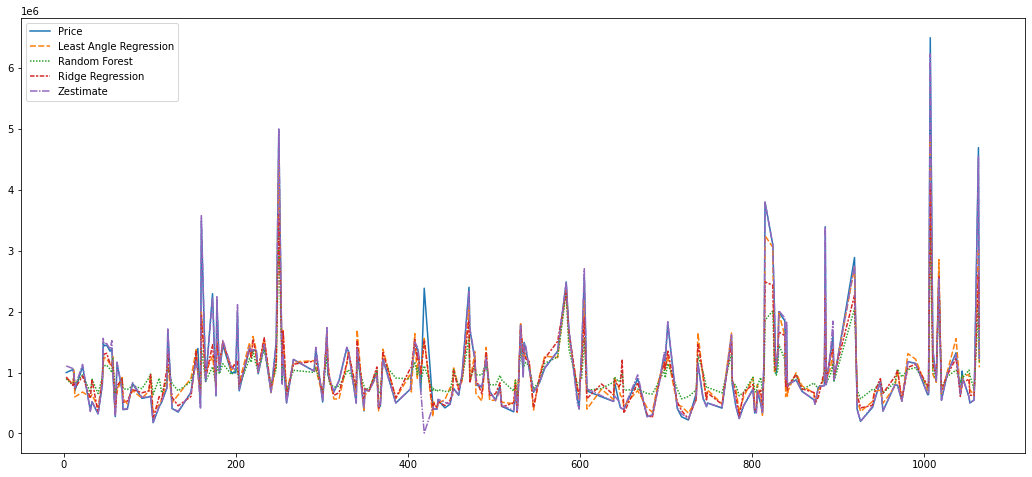

In [31]:
plt.figure(figsize=(18,8))
sns.lineplot(data=modelEvaluation)
#plt.savefig('Zestimate_Model_Comparison.png')

In [34]:
print('Comparing Model with Zestimate:')
print('For Ridge Regression Model, we got an R^2 of',(reg2.score(test_X,zestimateModelComparison)))
print('For Least Angle Regression Model, we got an R^2 of',(reg3.score(test_X,zestimateModelComparison)))
print('For Random Forest Model, we got an R^2 of',(rfc.score(test_X,zestimateModelComparison)))

Comparing Model with Zestimate:
For Ridge Regression Model, we got an R^2 of 0.7801585944138177
For Least Angle Regression Model, we got an R^2 of 0.8316374899606311
For Random Forest Model, we got an R^2 of 0.6083631057357126


In [33]:
print('Comparing Model with Listing Price:')
print('For Ridge Regression Model, we got an R^2 of',(reg2.score(test_X,test_y)))
print('For Least Angle Regression Model, we got an R^2 of',(reg3.score(test_X,test_y)))
print('For Random Forest Model, we got an R^2 of',(rfc.score(test_X,test_y)))

Comparing Model with Listing Price:
For Ridge Regression Model, we got an R^2 of 0.7920088057962149
For Least Angle Regression Model, we got an R^2 of 0.8477392450426151
For Random Forest Model, we got an R^2 of 0.6104549384107595


# Is real estate market near San Francisco International Airport more expensive?

In [ ]:
z6 = pd.read_csv('Zillow-CleanedData.csv')

In [ ]:
z6 = z6[['Address','Price', 'City', 'Bedrooms', 'Living-Area', 'Total-Bathrooms', 'Home-Type']]

In [ ]:
z6 = z6.head(450)

In [ ]:
gmaps = googlemaps.Client(key='myAPIkey') #removed intentionally

durationList=[]
distanceList=[]

for i in range(len(z6['Address'])):
    directions={}
    now = datetime.now()
    directions = gmaps.directions(z6['Address'][i],"San Francisco International Airport",
                                     mode="driving",
                                     departure_time=now)
    distanceList.append(str(directions[0]['legs'][0]['distance']['text']))
    durationList.append(str(directions[0]['legs'][0]['duration']['text']))

In [ ]:
z6['Distance'] = distanceList[:450]
z6['Duration'] = durationList[:450]

In [ ]:
z6.to_csv("Zillow-addToSFO2.csv") #export data to csv

In [21]:
z6 = pd.read_csv('Zillow-addToSFO2.csv')

In [22]:
z6.head()

,Unnamed: 0,Address,Price,City,Bedrooms,Living-Area,Total-Bathrooms,Home-Type,Distance,Duration
0,0,"2863 S Bascom Ave APT 808, Campbell, CA 95008",599000,Campbell,2,841.0,2,Condo,38.5,39 mins
1,1,"6035 Admiralty Pl, San Jose, CA 95123",895000,San Jose,3,1328.0,3,Single Family,42.7,42 mins
2,2,"761 Bonita Pl, San Jose, CA 95116",642888,San Jose,3,1231.0,3,Townhouse,36.5,37 mins
3,3,"100 Ballatore Ct, San Jose, CA 95134",999900,San Jose,3,1405.0,3,Townhouse,30.4,32 mins
4,4,"2664 Senter Rd APT 221, San Jose, CA 95111",550000,San Jose,2,1026.0,2,Condo,40.1,41 mins


In [24]:
z6.sort_values(by='Distance', ascending=True)

,Unnamed: 0,Address,Price,City,Bedrooms,Living-Area,Total-Bathrooms,Home-Type,Distance,Duration
310,310,"1488 El Camino Real UNIT 209, South San Franci...",929998,South San Francisco,2,990.0,2,Condo,1.9,6 mins
433,433,"1031 Cherry Ave APT 40, San Bruno, CA 94066",800000,San Bruno,3,1342.0,2,Condo,2.7,6 mins
432,432,"1126 Cherry Ave APT 80, San Bruno, CA 94066",435000,San Bruno,0,450.0,1,Condo,2.9,5 mins
317,317,"455 El Camino Real APT 405, South San Francisc...",599888,South San Francisco,1,730.0,1,Condo,3.2,6 mins
431,431,"402 Boardwalk Ave APT 19, San Bruno, CA 94066",540000,San Bruno,1,650.0,1,Condo,3.3,7 mins
429,429,"402 Boardwalk Ave APT 16, San Bruno, CA 94066",460000,San Bruno,0,450.0,1,Condo,3.3,7 mins
311,311,"85 Idlewood Ct, South San Francisco, CA 94080",1428000,South San Francisco,4,2150.0,3,Single Family,3.4,8 mins
435,435,"6153 Shelter Creek Ln, San Bruno, CA 94066",549000,San Bruno,1,680.0,1,Condo,4.1,6 mins
434,434,"2221 Shelter Creek Ln, San Bruno, CA 94066",399000,San Bruno,0,490.0,1,Condo,4.1,6 mins
437,437,"2146 Shelter Creek Ln, San Bruno, CA 94066",399000,San Bruno,0,490.0,1,Condo,4.2,7 mins


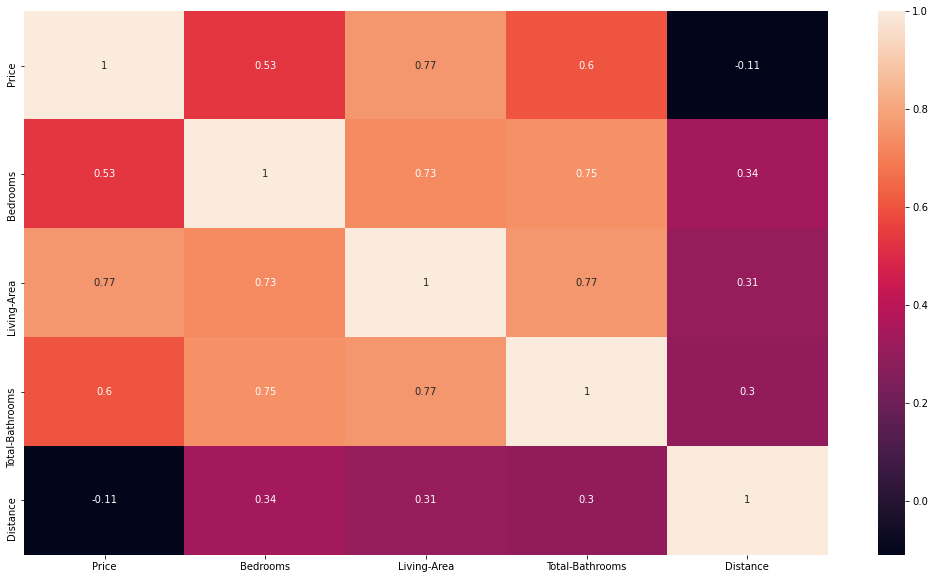

In [37]:
z6 = z6.drop(['Unnamed: 0'],axis=1)
plt.figure(figsize=(18,10))
sns.heatmap(z6.corr(),annot=True)
#plt.savefig('Correlation_Heatmap_Google.png')

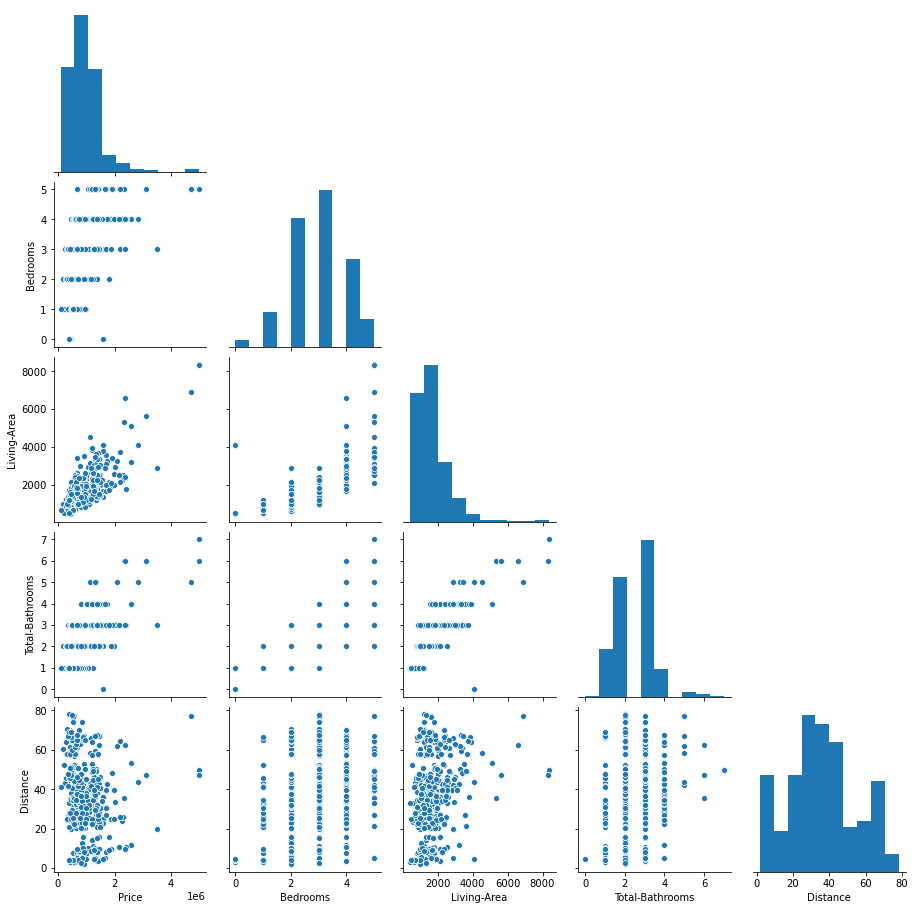

In [38]:
sns.pairplot(z6, corner=True)
#plt.savefig('Pairplot_Google.png')